<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
import math

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://placekitten.com/800/571","https://backlightblog.com/images/2021/09/low-contrast-photography-1.jpg"]  # Random image of a kitten

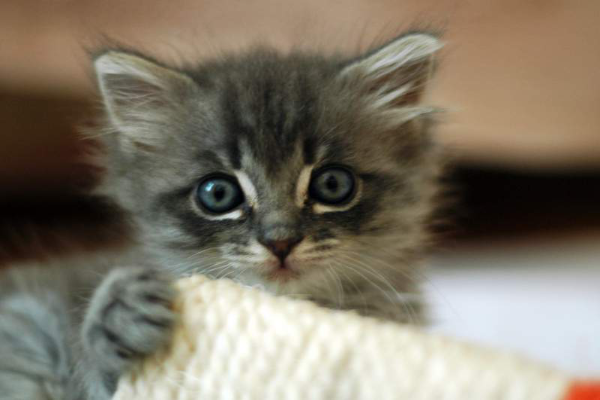

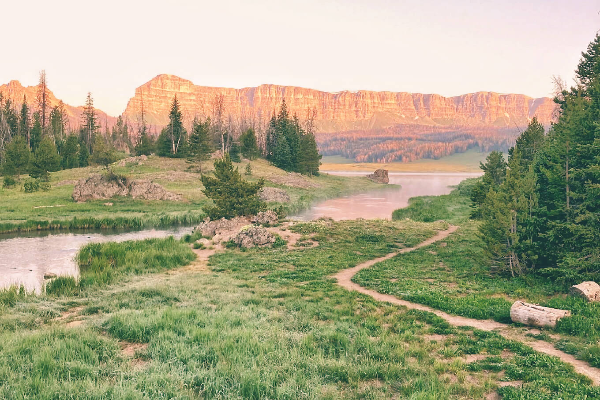

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(image, (600, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

In [ ]:
def grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    return gray

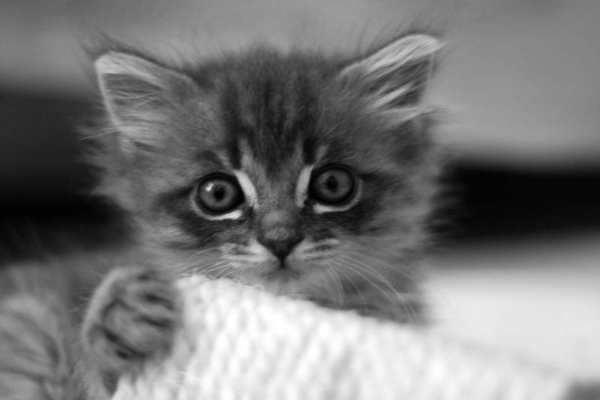

In [ ]:
gray = grayscale(images[0])

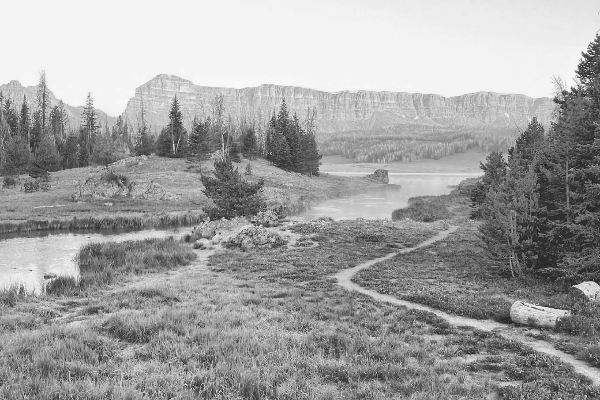

In [ ]:
gray2 = grayscale(images[1])

In [ ]:
def apply_padding(image, pad):
 padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=pad)
 return padded

In [ ]:
def apply_multi_pad(image, pad, n):
  for i in range(n):
    image = apply_padding(image, pad)
  return image

In [ ]:
padded_gray = apply_multi_pad(gray, 245, 100)
print(padded_gray[100,100])

96


## Translation

Translation: f (x, y) → f (x′, y′) where x′ = x + ∆x and y′ = y + ∆y. Note that ∆x and ∆y are the translation in x and y, respectively.

In [ ]:
def translation(image, dx, dy): # n is the number of times the image was padded
  n = max(dx, dy) + 10
  r, c = image.shape
  padded = apply_multi_pad(image, 0, n)
  cv2_imshow(padded)
  print("\n\n")
  translated = np.zeros((r+(2*n))*(c+(2*n))).reshape(r+(2*n),c+(2*n))
  for i in range(n, r+n):
    for j in range(n, c+n):
      translated[i+dx][j+dy] = image[i-n][j-n]
  cv2_imshow(translated)
  return translated

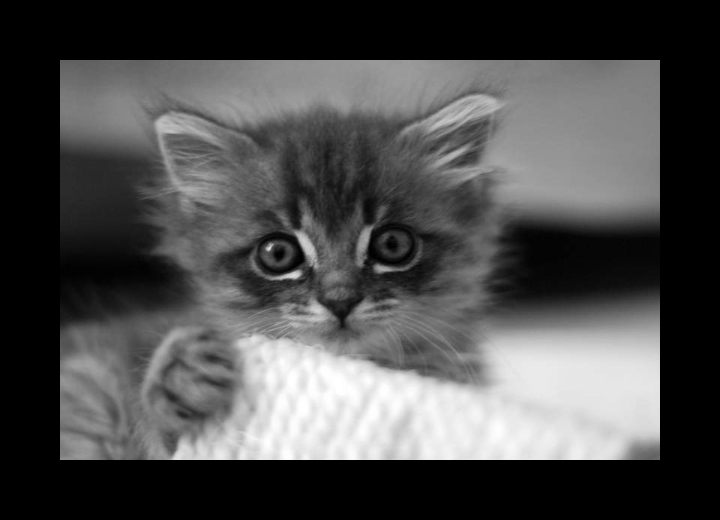

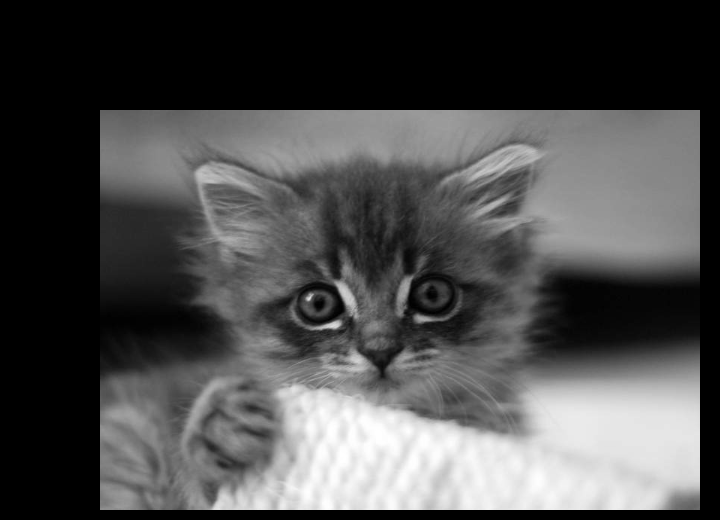

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
translation(gray, 50, 40)

## Scaling

Scaling: f (x, y) → f (x′, y′) where x′ = Ax · x and y′ = Ay · y. Note that Ax and Ay are the scaling factor in x and y, respectively.

In [ ]:
def scaling(image, Ax, Ay, n): # n is the number of times the image was padded
  r, c = image.shape
  padded = apply_multi_pad(image, 0, n)
  cv2_imshow(padded)
  print("\n\n")
  scaled = np.zeros((r+(2*n))*(c+(2*n))).reshape(r+(2*n),c+(2*n))
  for i in range(n, r+n):
    for j in range(n, c+n):
      scaled[math.floor((i-n)*Ax)][math.floor((j-n)*Ay)] = image[i-n][j-n]
  cv2_imshow(scaled)
  return scaled

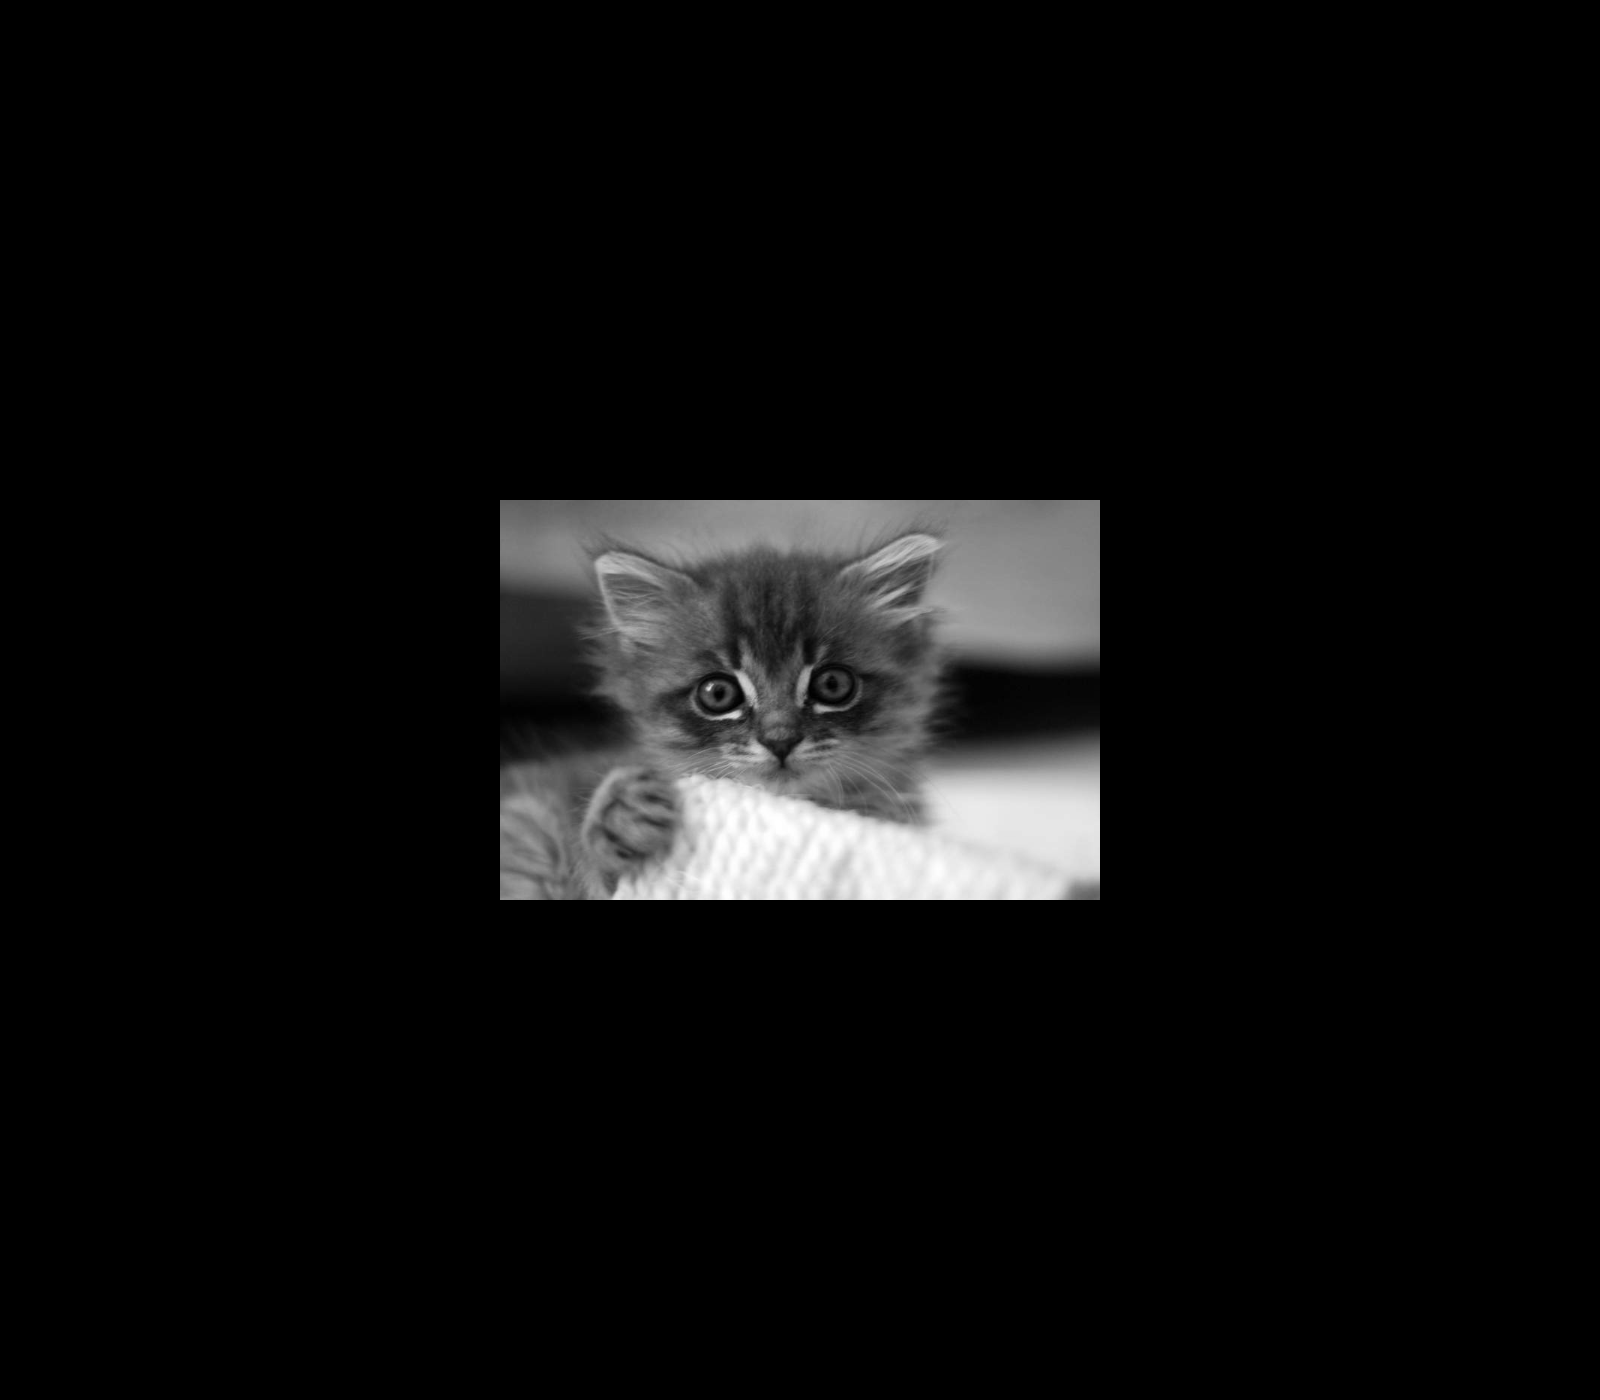

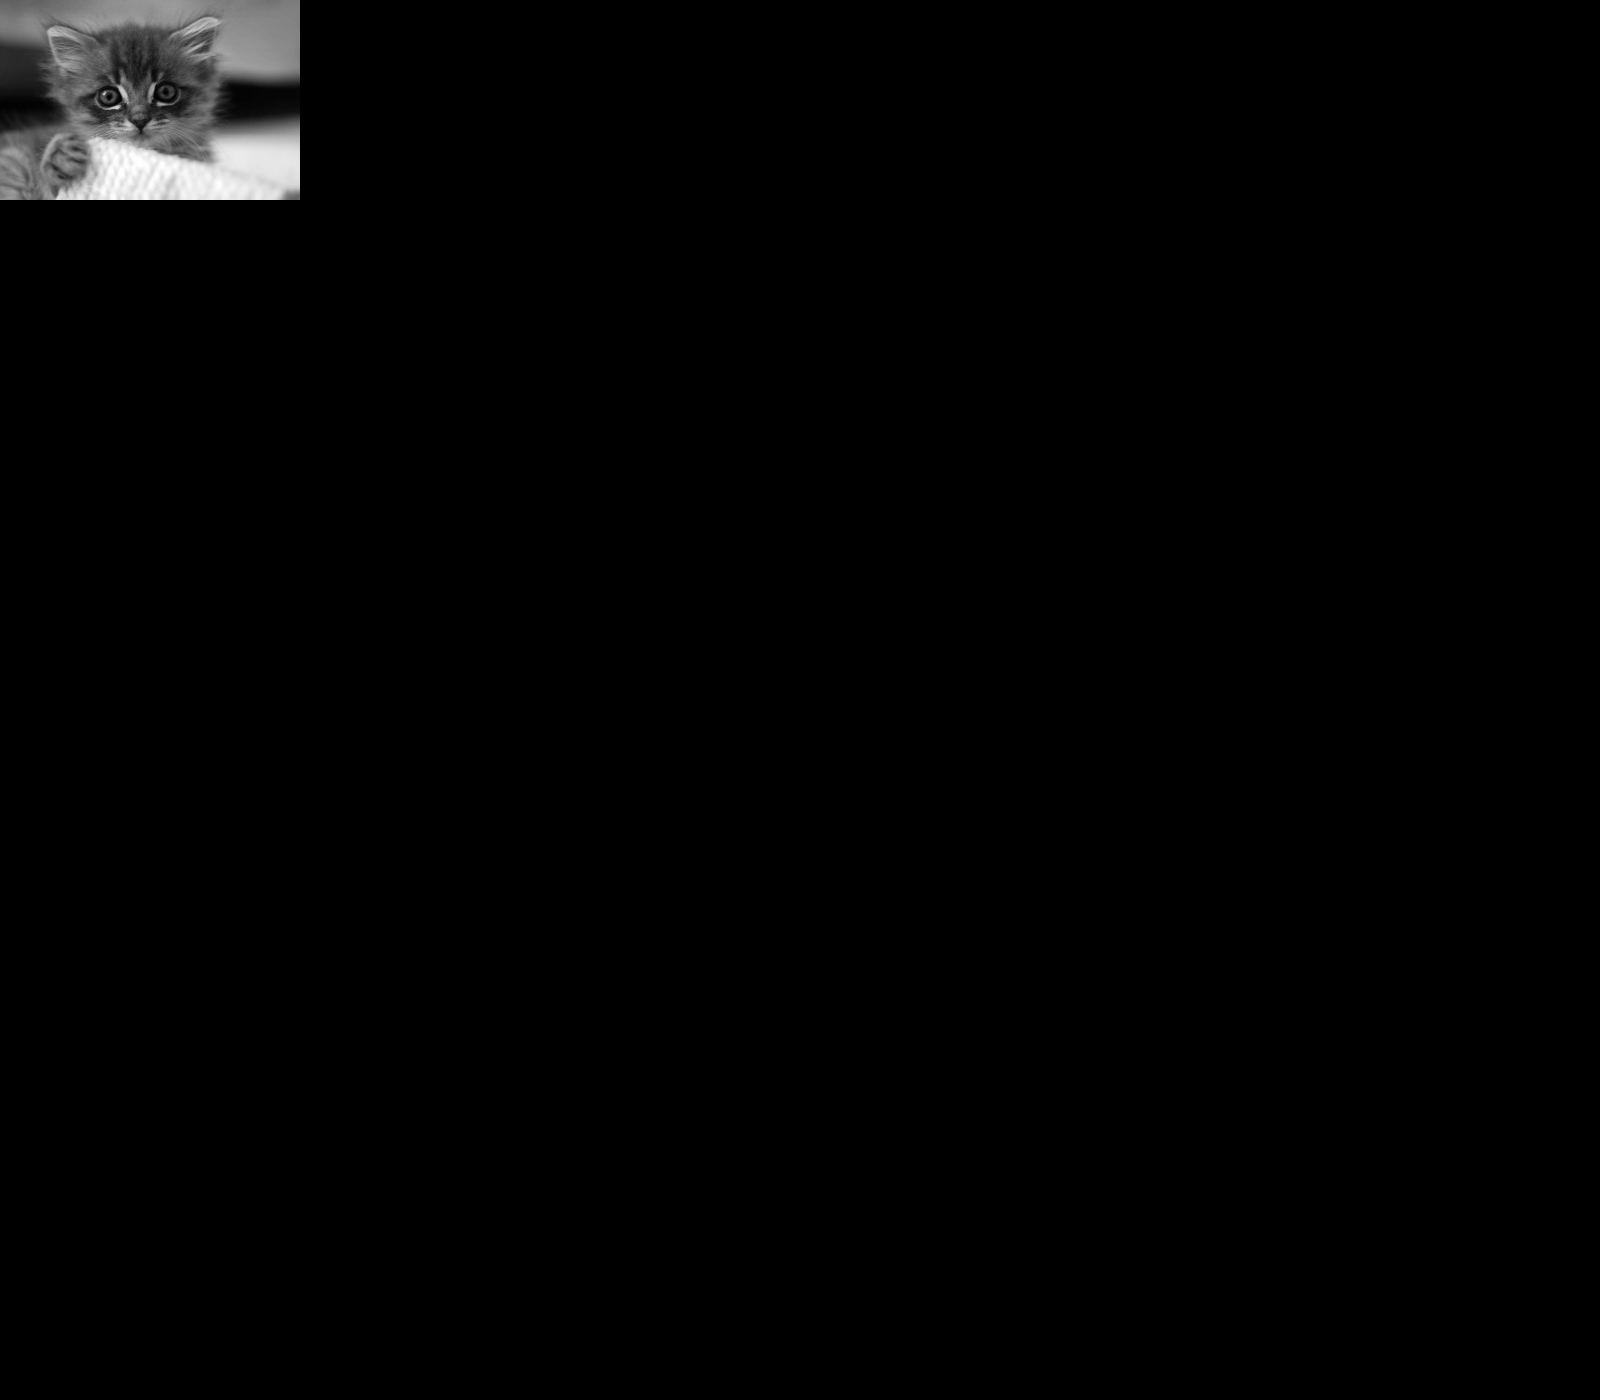

array([[97., 97., 97., ...,  0.,  0.,  0.],
       [98., 98., 98., ...,  0.,  0.,  0.],
       [99., 99., 99., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
scaling(gray, 0.5, 0.5, 500)

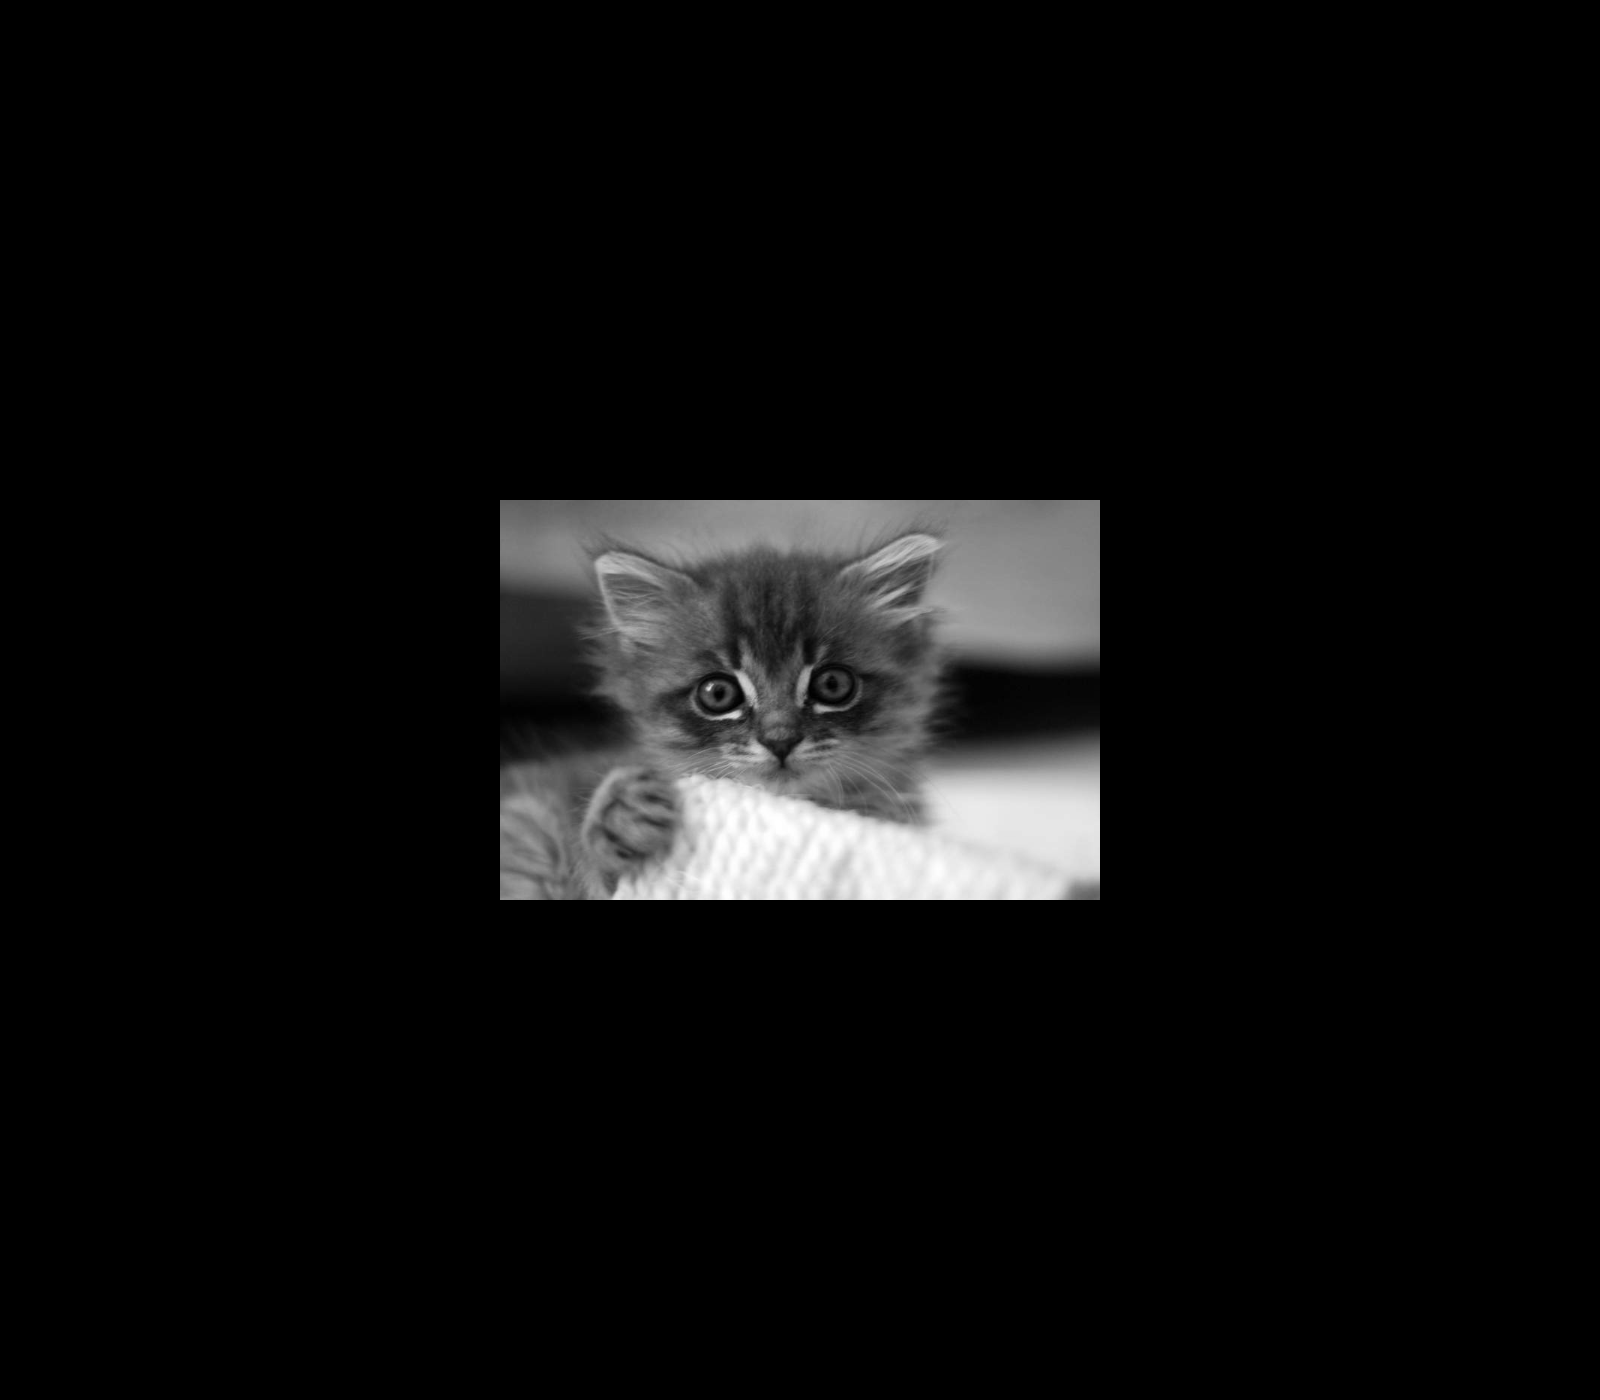

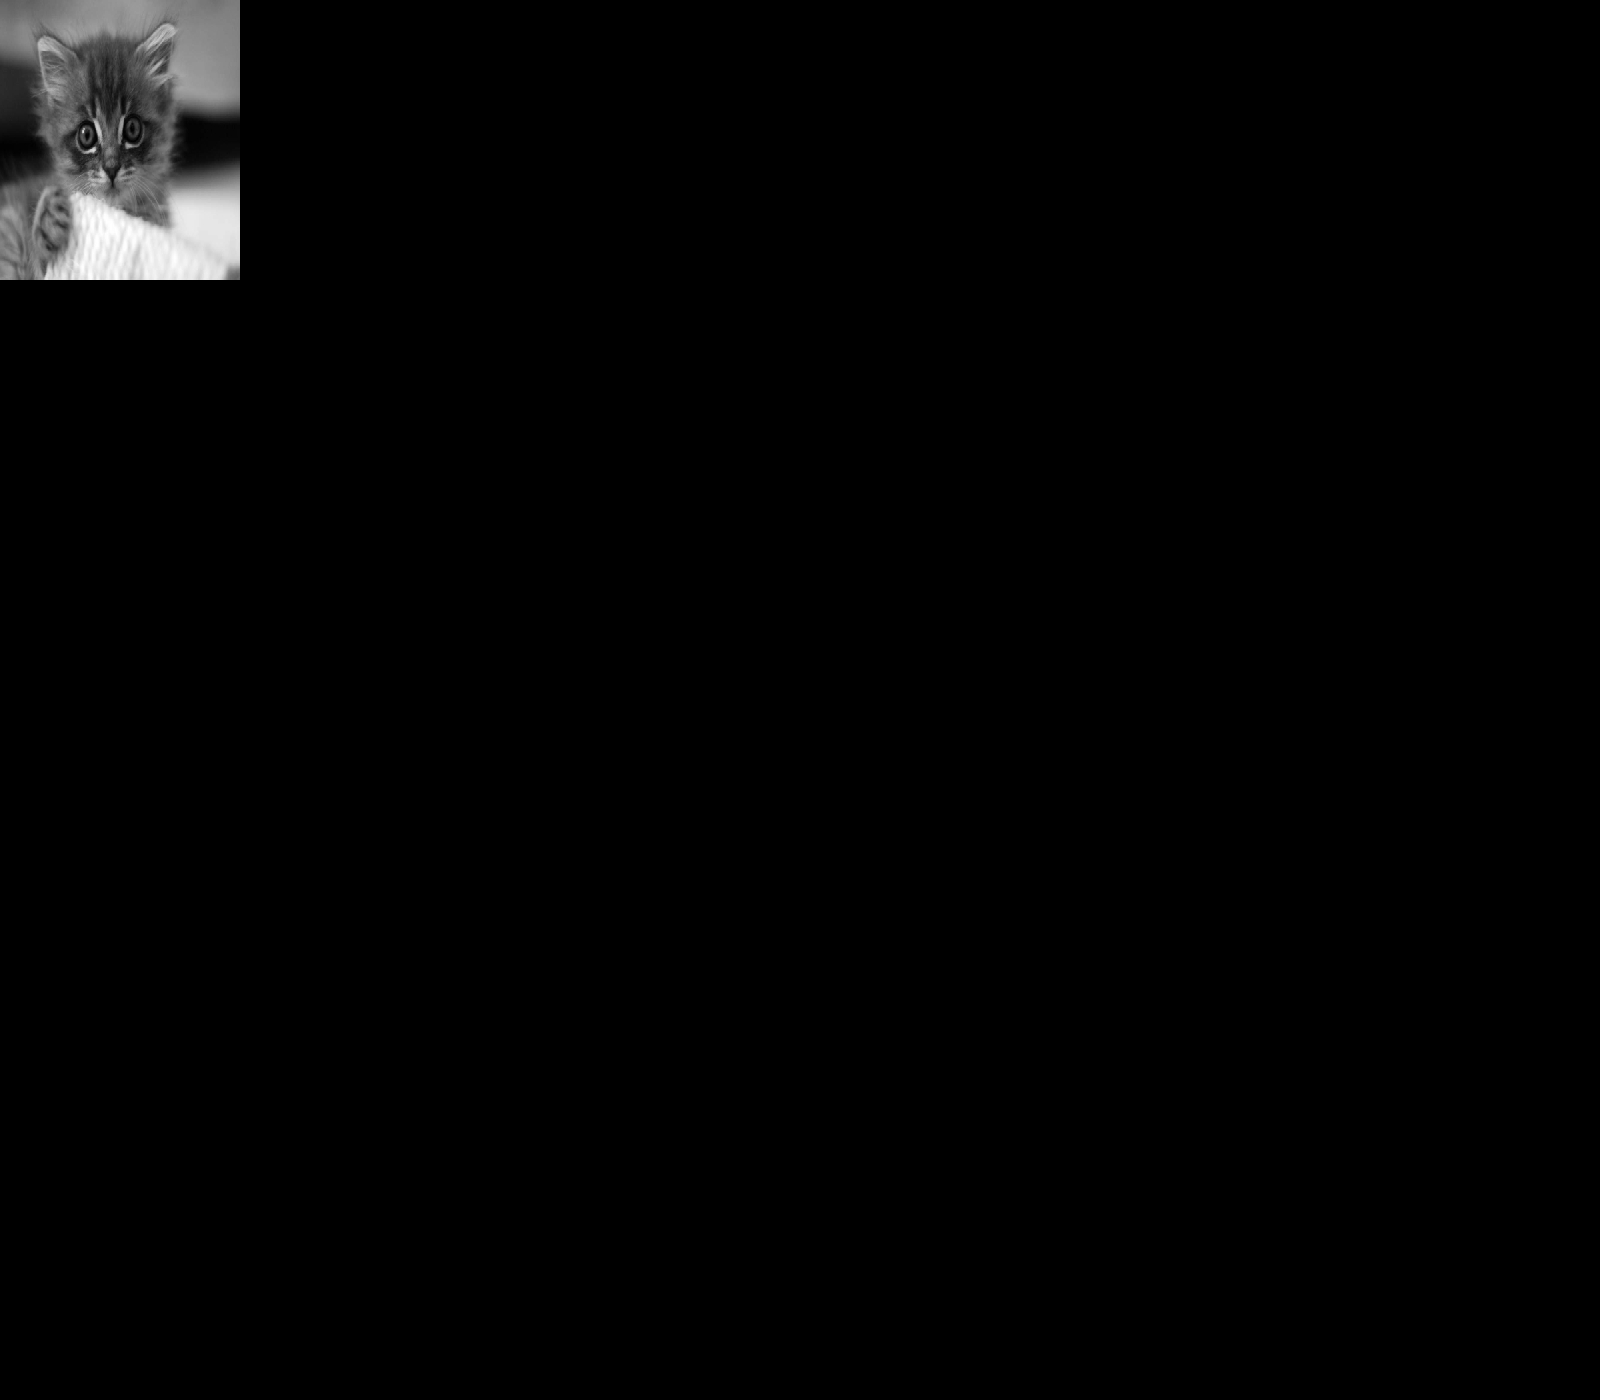

array([[ 97.,  97.,  96., ...,   0.,   0.,   0.],
       [ 97.,  97.,  97., ...,   0.,   0.,   0.],
       [ 99.,  99., 100., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [ ]:
scaling(gray, 0.7, 0.4, 500)

## Zooming using pixel replication

In [ ]:
def zooming(image):
  r, c = image.shape
  zoomed = image.copy()
  # row wise zooming
  rzoomed = np.zeros((r)*(2*c)).reshape(r,(2*c))
  k = 0
  for i in range(r):
    for j in range(c):
      rzoomed[i][k] = zoomed[i][j]
      rzoomed[i][k+1] = zoomed[i][j]
      k += 2
    k = 0

  # column wise zooming
  r, c = rzoomed.shape
  czoomed = np.zeros((r*2)*(c)).reshape(r*2,c)
  k = 0
  for i in range(r):
    for j in range(c):
      czoomed[k][j] = rzoomed[i][j]
      czoomed[k+1][j] = rzoomed[i][j]

    k += 2

  cv2_imshow(czoomed)
  return czoomed

In [ ]:
def zoomingktimes(image, n):
  for i in range(n):
    image = zooming(image)

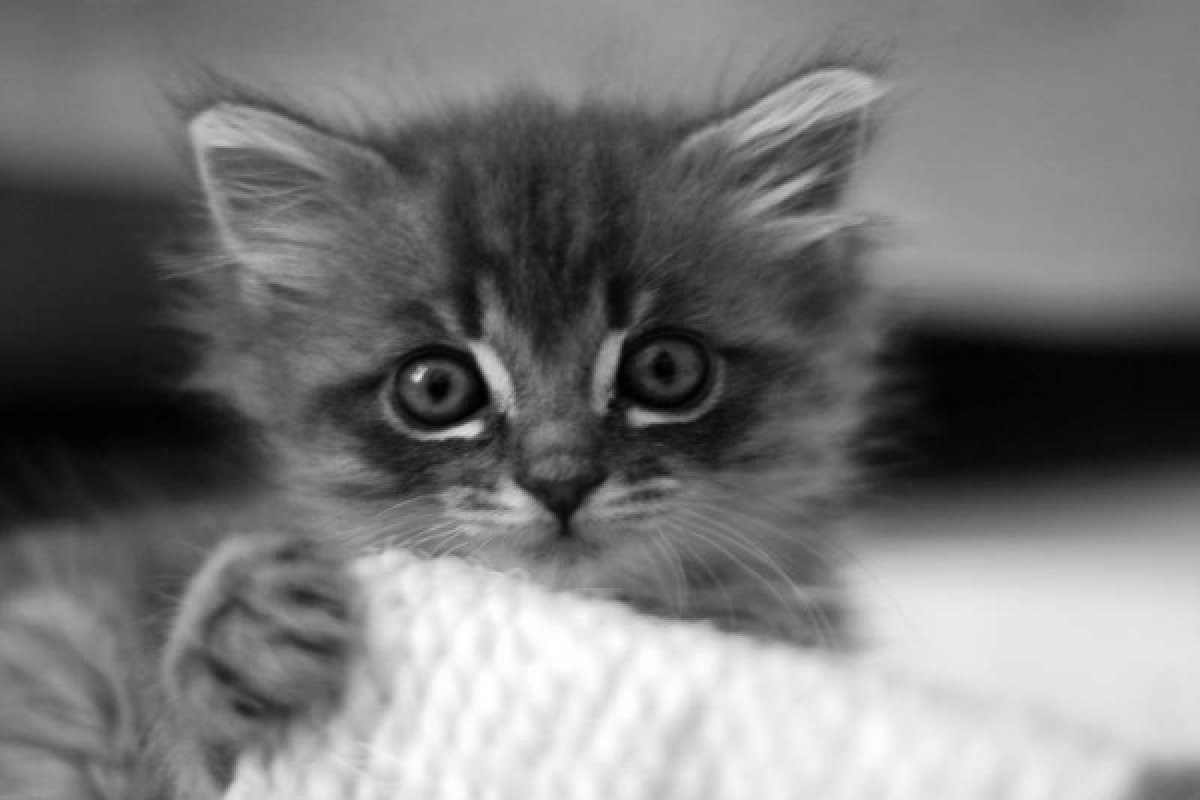

array([[ 96.,  96.,  96., ..., 124., 124., 124.],
       [ 96.,  96.,  96., ..., 124., 124., 124.],
       [ 97.,  97.,  97., ..., 124., 124., 124.],
       ...,
       [141., 141., 141., ..., 107., 103., 103.],
       [141., 141., 141., ..., 107., 103., 103.],
       [141., 141., 141., ..., 107., 103., 103.]])

In [ ]:
zooming(gray)

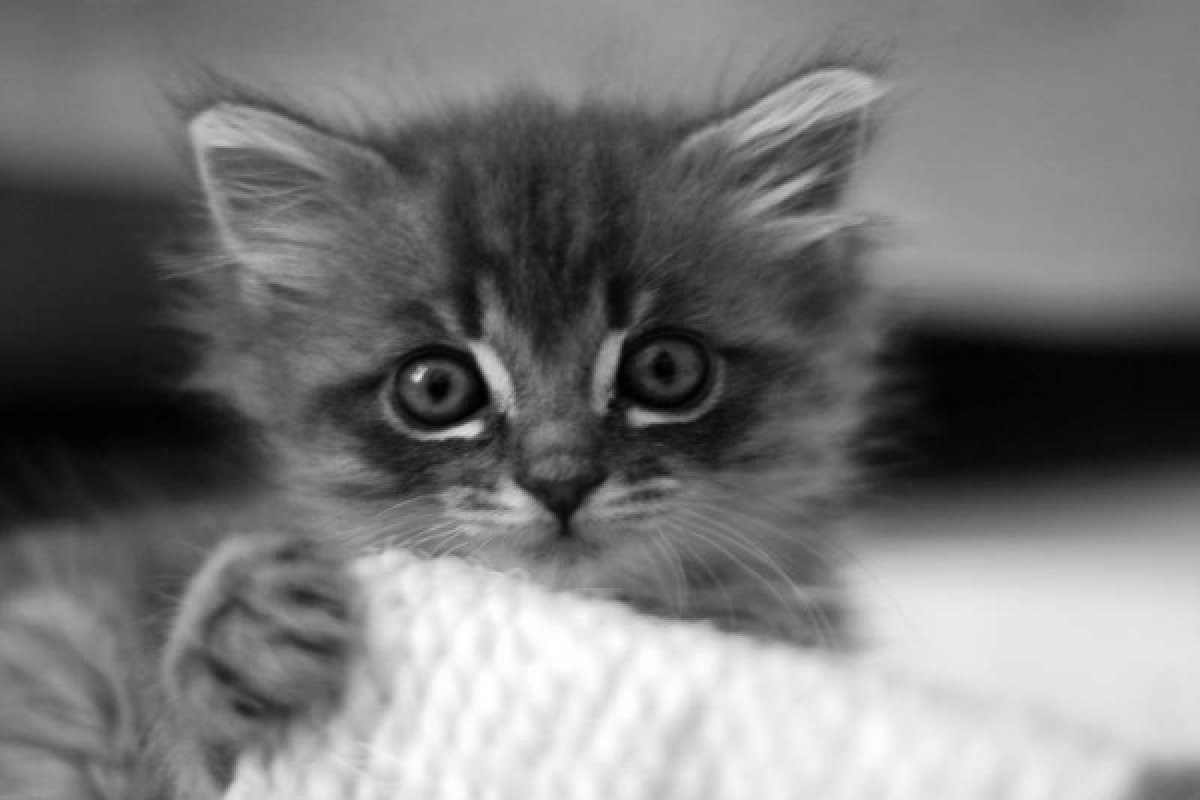

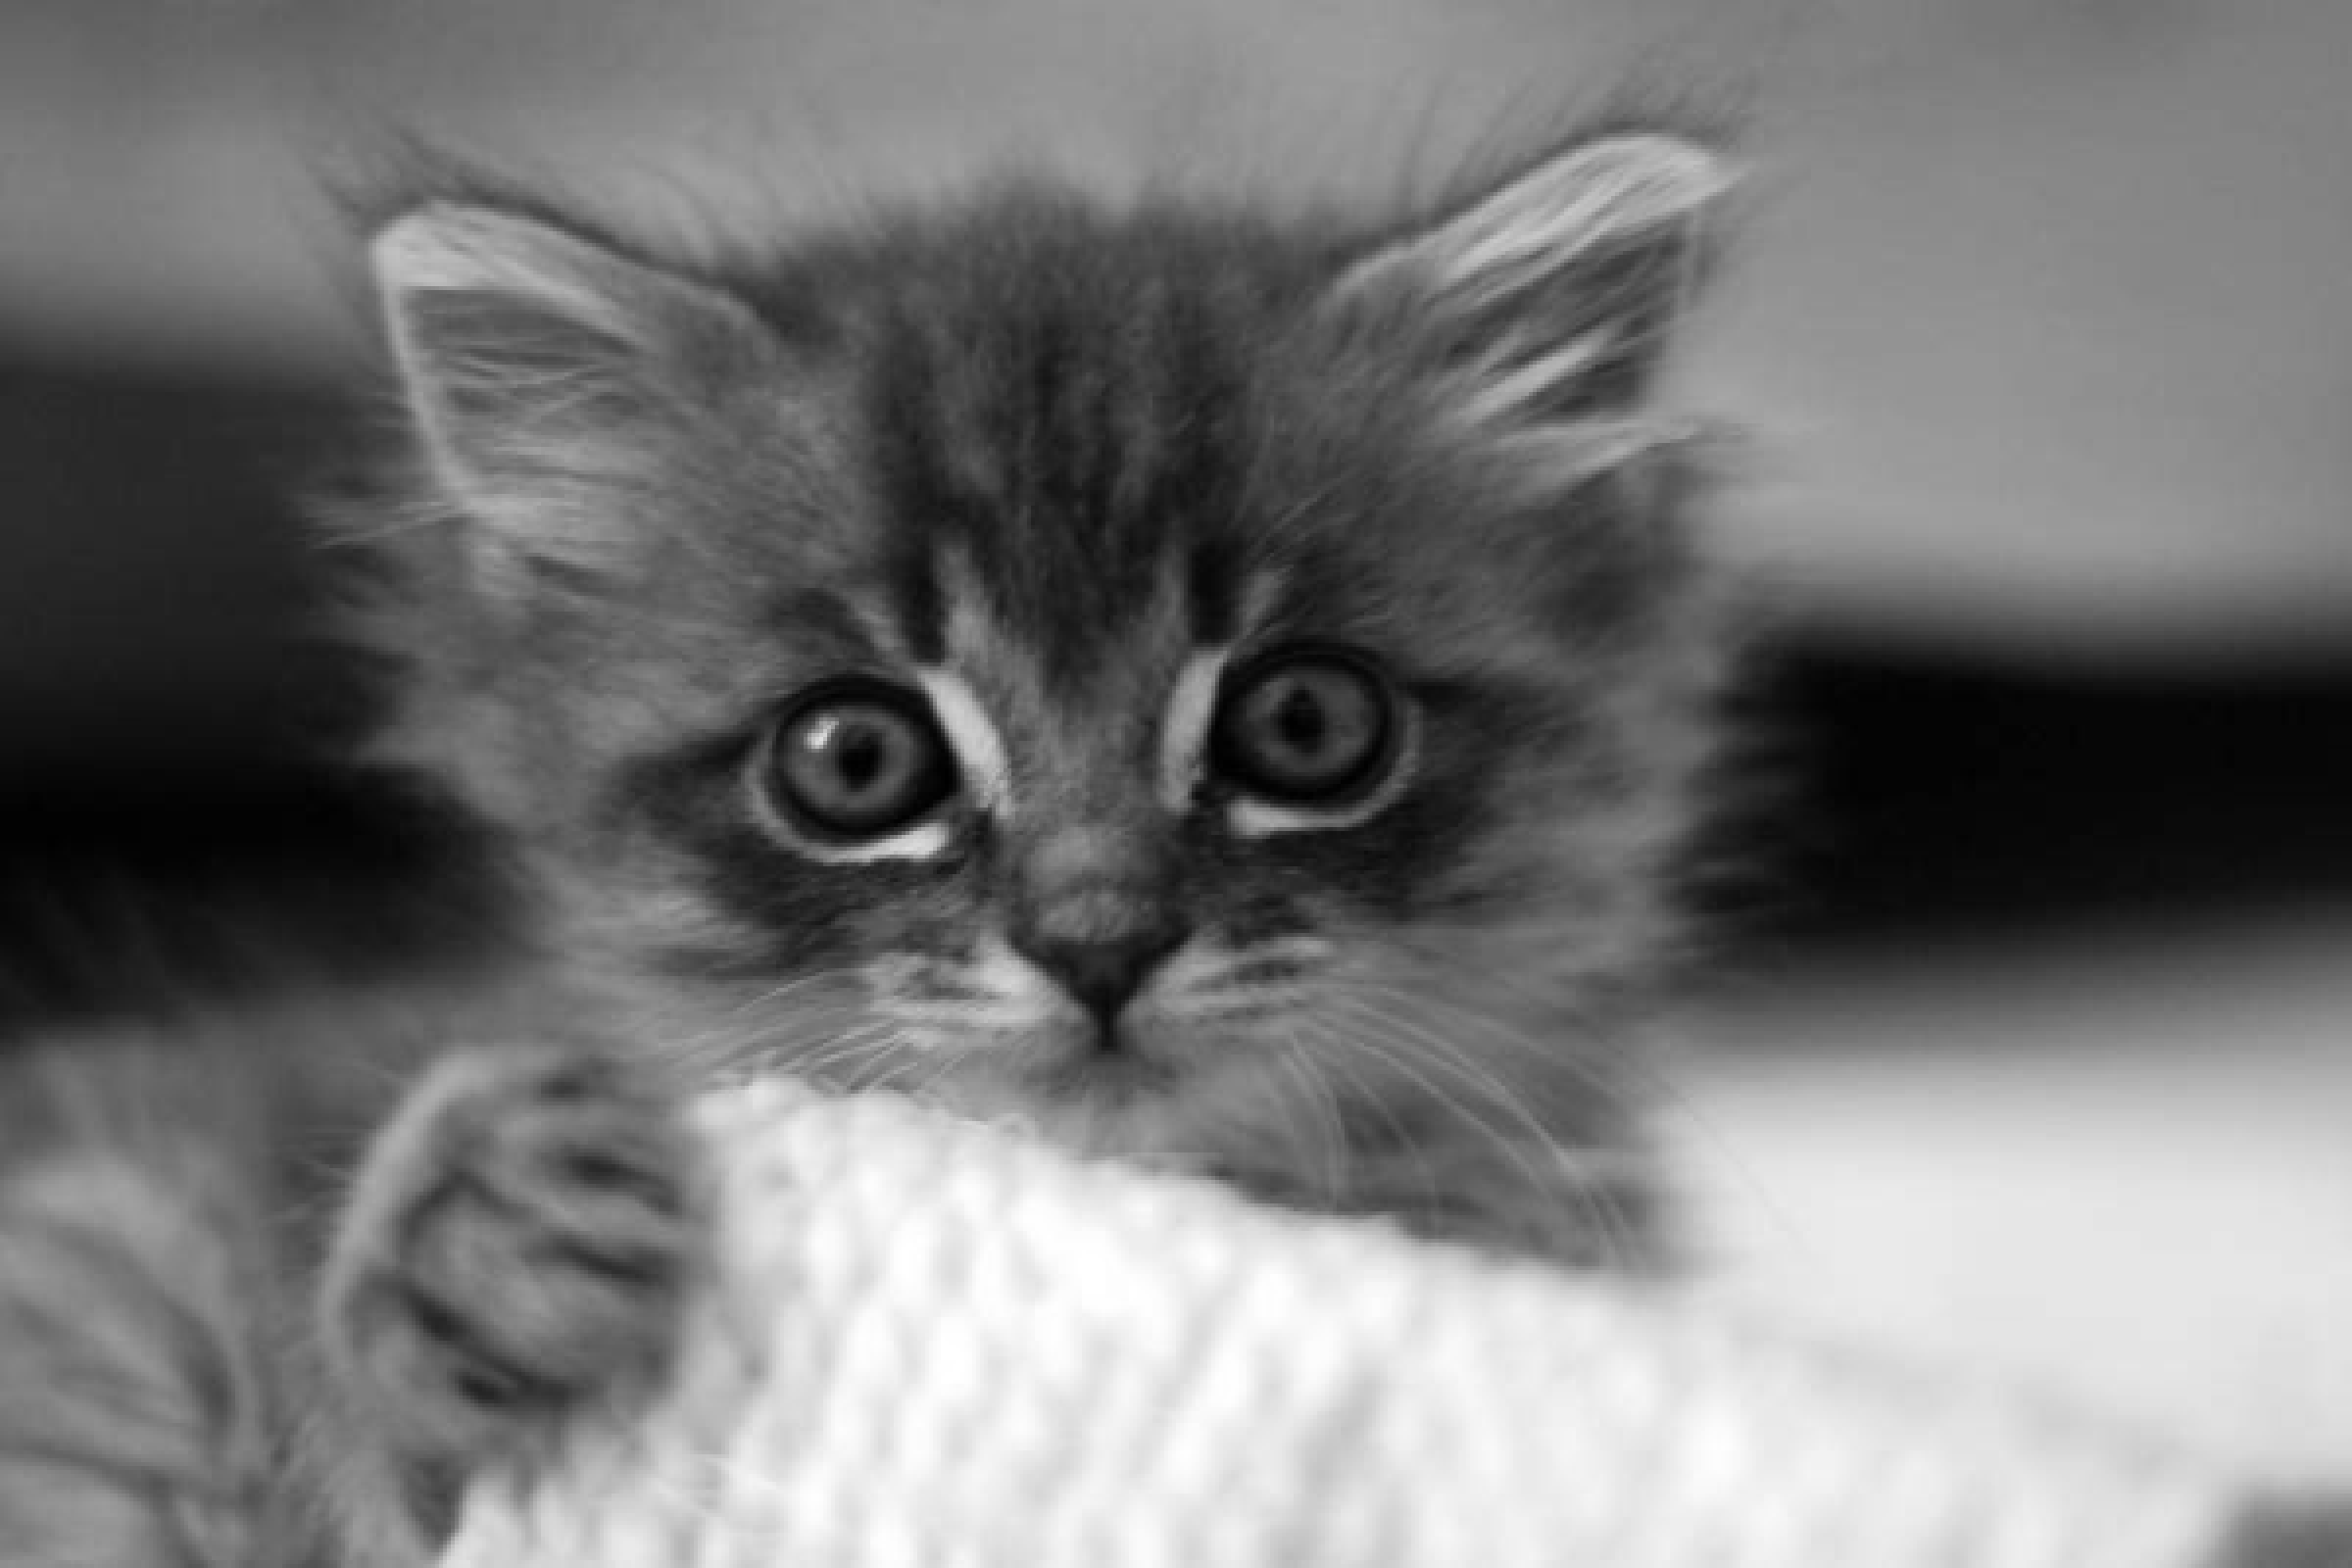

In [ ]:
zoomingktimes(gray, 2)